# Data Science Project-1: Data Mining in Yelp Data

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: A data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

# ANSWER

**Problem: Estimating a Restaurant's Performance with Yelp Dataset.**

**Problem Description:**
The challenge lies in leveraging Yelp data to forecast restaurant performance. Yelp is a well-known website and mobile application that was established in 2004 with a primary focus on user-generated reviews and ratings of nearby companies, especially restaurants. To figure out the probability of a restaurant's success concerning popularity, client satisfaction, and longevity, a variety of elements are analyzed, including reviews, ratings, location, cuisine type, and other essential features.

**Relevance and Interest:**
This issue holds significance for multiple reasons:

*Economic Impact:* Restaurants have a big impact on the economy by fostering local growth and the creation of jobs. Estimating their likelihood of success can assist investors in making well-informed decisions, which may improve resource efficiency and spur economic expansion.

*Customer Experience:* By forecasting restaurant success, patrons may choose restaurants with greater knowledge, which enhances eating satisfaction and experiences.

*Business insights:* By comprehending the elements that lead to restaurant success, managers and owners can get important knowledge that will help them improve their operations, menu selections, and marketing tactics.

*Social Impact:* Bustling restaurants frequently develop into the center of the community, promoting cross-cultural dialogue and social engagement. The expansion of these businesses can be encouraged by predicting success and strengthening the bonds that bind communities.

As a whole, there may be a wide range of effects on investors, patrons, restaurant owners, and local communities from using Yelp data to forecast restaurant performance.


# Data Collection/Processing: 

In [6]:
# Importing the pandas library.
import pandas as pd

# Reading the entire JSON file into a DataFrame with the Yelp's Business Dataset.
yelp_business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)

# Reading the entire JSON file into a DataFrame with the Yelp's Checkin Dataset.
yelp_checkin_data = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)



In [2]:
# Display the first five rows of the yelp's business data frame.
yelp_business_data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,None,"Insurance, Financial Services",None
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [3]:
#Display the first five rows of the yelp's checkin data frame.
yelp_checkin_data.head()

,checkin_info,type,business_id
0,"{'9-5': 1, '7-5': 1, '13-3': 1, '17-6': 1, '13...",checkin,cE27W9VPgO88Qxe4ol6y_g
1,"{'16-2': 1, '22-5': 1, '9-5': 1, '9-4': 3, '15...",checkin,mVHrayjG3uZ_RLHkLj-AMg
2,"{'23-1': 1, '13-4': 1, '17-6': 1, '15-1': 1, '...",checkin,KayYbHCt-RkbGcPdGOThNg
3,"{'5-5': 2, '5-1': 2, '8-2': 1}",checkin,b12U9TFESStdy7CsTtcOeg
4,"{'15-1': 1, '13-3': 1, '16-0': 1, '9-3': 1, '1...",checkin,QoDa50dc7g62xciFygXB9w


In [7]:
# Checking whether nulls are present in the business dataset.
print("Total number of nulls in each feature in business data:\n", yelp_business_data.isnull().sum())

Total number of nulls in each feature in business data:
 business_id         0
name                0
neighborhood        0
address             0
city                0
state               0
postal_code         0
latitude            6
longitude           6
stars               0
review_count        0
is_open             0
attributes      25786
categories        541
hours           44802
dtype: int64


In [8]:
# Checking whether nulls are present in the checkin dataset.
print("Total number of nulls in each feature in checkin data:\n",yelp_checkin_data.isnull().sum())

Total number of nulls in each feature in checkin data:
 checkin_info    0
type            0
business_id     0
dtype: int64


In [9]:
# Replace the nulls with zeros with inplace as True.
yelp_business_data.fillna(0, inplace=True)

In [10]:
# Saving the modified version of the given yelp's business dataset.
yelp_business_data.to_json('modified_yelp_business_data.json', orient='records', lines=True)

In [11]:
# Checking the nulls if present or not after filling those places.
print("Total nulls present after replacing:\n",yelp_business_data.isnull().sum())

Total nulls present after replacing:
 business_id     0
name            0
neighborhood    0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


In [12]:
# Getting the summary statistics for the Yelp's Business dataset.
yelp_business_data.describe()

,latitude,longitude,stars,review_count,is_open
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,38.505568,-97.487772,3.631550,31.797310,0.830391
std,5.127205,17.701622,1.016783,104.124212,0.375290
min,-71.753941,-180.000000,1.000000,3.000000,0.000000
25%,33.630846,-112.279267,3.000000,4.000000,1.000000
50%,36.143591,-111.777190,3.500000,9.000000,1.000000
75%,43.593106,-79.982898,4.500000,24.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000


In [13]:
# Getting the summary statistics for the Yelp's checkin dataset.
yelp_checkin_data.describe()

,checkin_info,type,business_id
count,55569,55569,55569
unique,55555,1,55569
top,"{'22-6': 1, '12-4': 1, '13-5': 1}",checkin,cE27W9VPgO88Qxe4ol6y_g
freq,2,55569,1


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* printing the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [14]:
# Importing the pandas library.
import pandas as pd

# Assuming the JSON data is stored in a variable named 'yelp_data'
# Replace 'yelp_data' with the actual JSON data variable

# Convert the JSON data into a DataFrame
df_business = pd.DataFrame(yelp_business_data)

# flatten the attributes column if needed
# df['attributes'] = df['attributes'].apply(lambda x: {} if pd.isna(x) else x)
# df = pd.concat([df.drop(['attributes'], axis=1), df['attributes'].apply(pd.Series)], axis=1)

# Count the occurrences of each category
category_counts = df_business['categories'].str.split(', ', expand=True).stack().value_counts()

# Select the top 10 most popular categories
top_10_categories = category_counts.head(10)

# Display the top 10 most popular categories and their counts in a table
top_10_business = pd.DataFrame({'Category': top_10_categories.index, 'Count': top_10_categories.values})
top_10_business.index = range(1, len(top_10_business) + 1)  # Start index from 1
top_10_business.index.name = 'Rank'
print("The top 10 most popular business categories in the dataset and their counts:")
print("-"*76,"\n",top_10_business)

The top 10 most popular business categories in the dataset and their counts:
---------------------------------------------------------------------------- 
               Category  Count
Rank                         
1          Restaurants  57173
2             Shopping  30231
3                 Food  27118
4        Beauty & Spas  18967
5        Home Services  18634
6     Health & Medical  16157
7       Local Services  12906
8           Automotive  12656
9            Nightlife  12438
10                Bars  10853


**(2) Find the most popular business objects** 
* printing the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [15]:
# Assuming the JSON data is stored in a variable named 'checkin_data'
# Replace 'checkin_data' with the actual JSON data variable

import pandas as pd

# Assuming you've already loaded and processed your checkin_data into a DataFrame named df_checkin
df_checkin = pd.DataFrame(yelp_checkin_data)

# Initialize an empty dictionary to store check-in counts for each business object
checkin_counts = {}

# Iterate over each row of the DataFrame
for index, row in df_checkin.iterrows():  # Corrected to df_checkin.iterrows()
    # Extract business ID and check-in info from the row
    business_id = row['business_id']
    checkin_info = row['checkin_info']
    
    # Calculate the total number of check-ins for the current business object
    total_checkins = sum(checkin_info.values())
    
    # Update the check-in counts dictionary
    checkin_counts[business_id] = total_checkins

# Sort the business objects based on their check-in counts and select the top 10
top_10_businesses = sorted(checkin_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 most popular business objects and their check-in counts
top_10_checkins = pd.DataFrame(top_10_businesses, columns=['Business ID', 'Check-in Count'])
top_10_checkins.index = range(1, len(top_10_checkins) + 1)  # Start index from 1
top_10_checkins.index.name = 'Rank'
print("The top 10 most popular business objects/IDs in the dataset and their counts:")
print("-"*77,"\n",top_10_checkins)



The top 10 most popular business objects/IDs in the dataset and their counts:
----------------------------------------------------------------------------- 
                  Business ID  Check-in Count
Rank                                        
1     jf67Z1pnwElRSXllpQHiJg           77320
2     hW0Ne_HTHEAgGF1rAdmR-g           68711
3     3Q0QQPnHcJuX1DLCL9G9Cg           29893
4     AtjsjFzalWqJ7S9DUFQ4bw           27356
5     JpHE7yhMS5ehA9e8WG_ETg           18208
6     34uJtlPnKicSaX1V8_tu1A           18099
7     eWPFXL1Bmu1ImtIa2Rqliw           17671
8     -7yF42k0CcJhtPw51oaOqQ           17419
9     z3SyT8blMIhsZNvKJgKcRA           17161
10    2e2e7WgqU1BnpxmQL5jbfw           16641


**(3) Other explorations using given Yelp Datasets**


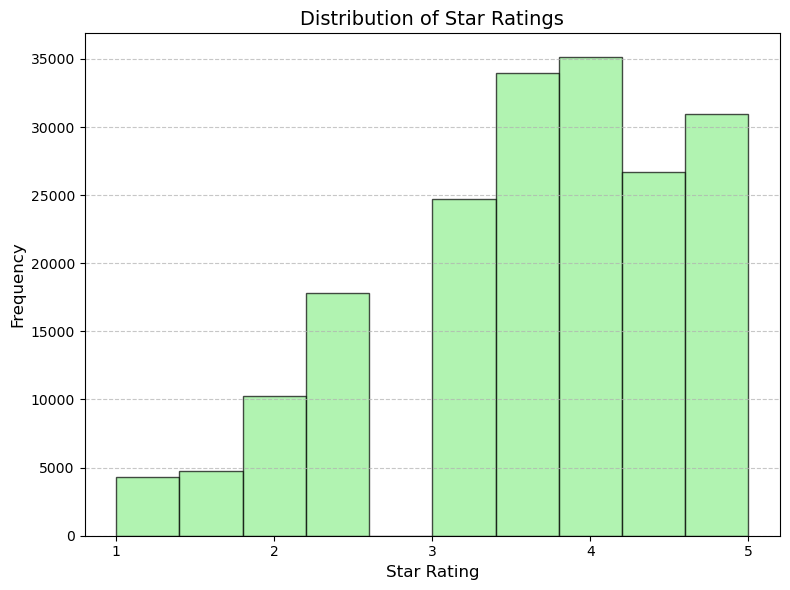

In [18]:
# Star Rating Distribution: Show how stars are distributed among businesses.

import matplotlib.pyplot as plt

# Assuming df_business is the DataFrame containing business data
plt.figure(figsize=(8, 6))
plt.hist(df_business['stars'], bins=10, edgecolor='black', color='lightgreen', alpha=0.7)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Star Ratings', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.xticks(range(1, 6))  # Set x-axis ticks to integer values
plt.yticks(fontsize=10)  # Set font size for y-axis ticks
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


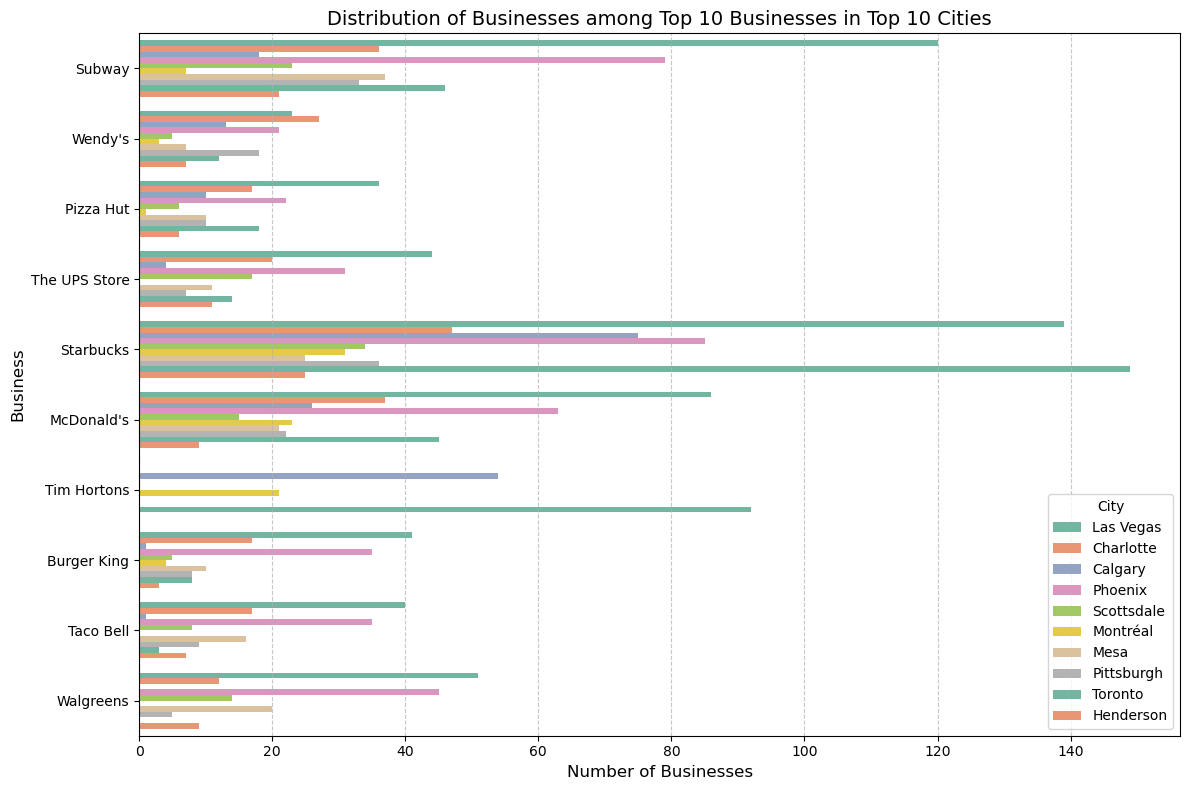

In [19]:
# Number of Businesses by Top 10 Cities: Chart the total number of businesses in top 10 cities.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_business is the DataFrame containing business data
# Replace df_business with your actual DataFrame

# Select the top 10 businesses
top_10_businesses = df_business['name'].value_counts().head(10).index

# Select the top 10 cities
top_10_cities = df_business['city'].value_counts().head(10).index

# Filter the DataFrame to include only the data for the top 10 businesses and top 10 cities
df_top_businesses_cities = df_business[(df_business['name'].isin(top_10_businesses)) & (df_business['city'].isin(top_10_cities))]

# Create a count plot to visualize the distribution of businesses among top 10 businesses in top 10 cities
plt.figure(figsize=(12, 8))
sns.countplot(y='name', hue='city', data=df_top_businesses_cities, palette='Set2')
plt.xlabel('Number of Businesses', fontsize=12)
plt.ylabel('Business', fontsize=12)
plt.title('Distribution of Businesses among Top 10 Businesses in Top 10 Cities', fontsize=14)
plt.legend(title='City', loc='lower right', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

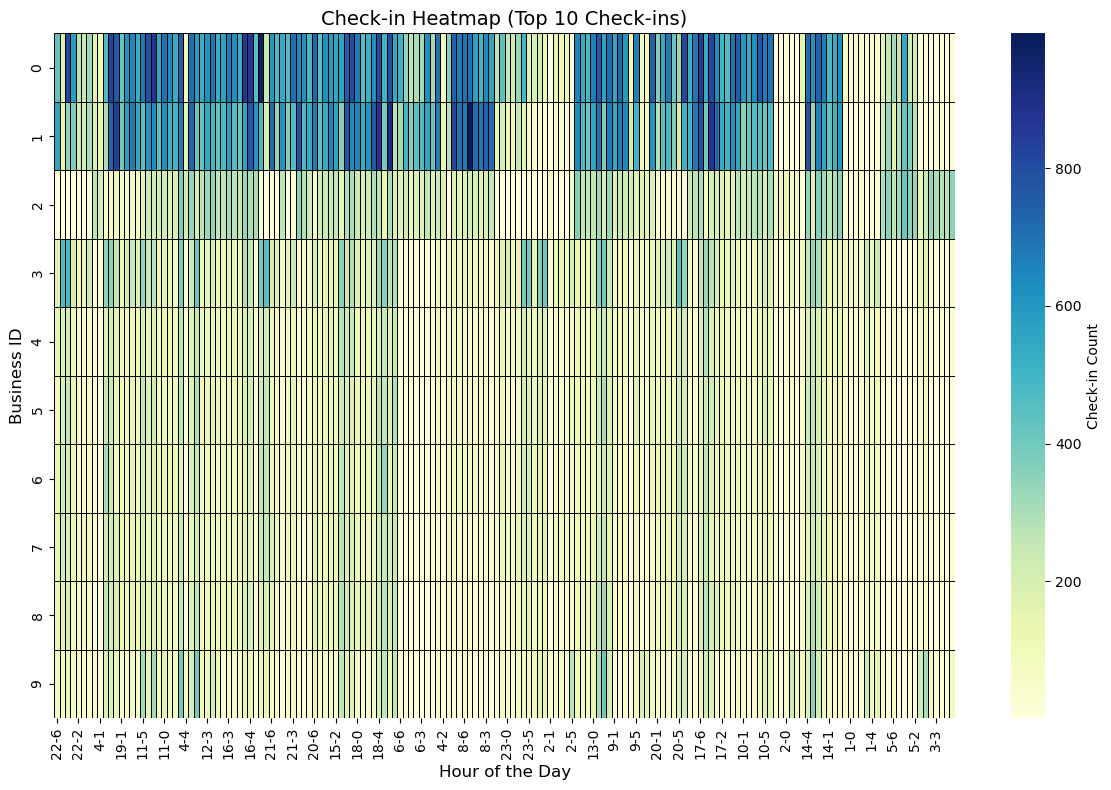

In [20]:
# Check-in Heatmap for Top 10 Check_ins: Showcase the activity related to top 10 check-ins at various times of the day.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_checkin is the DataFrame containing check-in data
df_checkin = pd.DataFrame(yelp_checkin_data)

# Get the top 10 check-ins
top_10_checkins = df_checkin['checkin_info'].apply(lambda x: sum(x.values())).nlargest(10).index

# Filter the DataFrame to include only the top 10 check-ins
df_top_10_checkins = df_checkin.loc[top_10_checkins]

# Convert check-in information to DataFrame and fill NaN values with 0
df_checkin_counts = pd.DataFrame(df_top_10_checkins['checkin_info'].tolist()).fillna(0)

# Create the heatmap plot with enhanced visual settings
plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization
sns.heatmap(df_checkin_counts, cmap='YlGnBu', cbar_kws={'label': 'Check-in Count'}, linewidths=0.5, linecolor='black')
plt.xlabel('Hour of the Day', fontsize=12)  # Adjust font size for better readability
plt.ylabel('Business ID', fontsize=12)  # Adjust font size for better readability
plt.title('Check-in Heatmap (Top 10 Check-ins)', fontsize=14)  # Adjust font size for better readability
plt.xticks(fontsize=10)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=10)  # Adjust font size for y-axis ticks
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



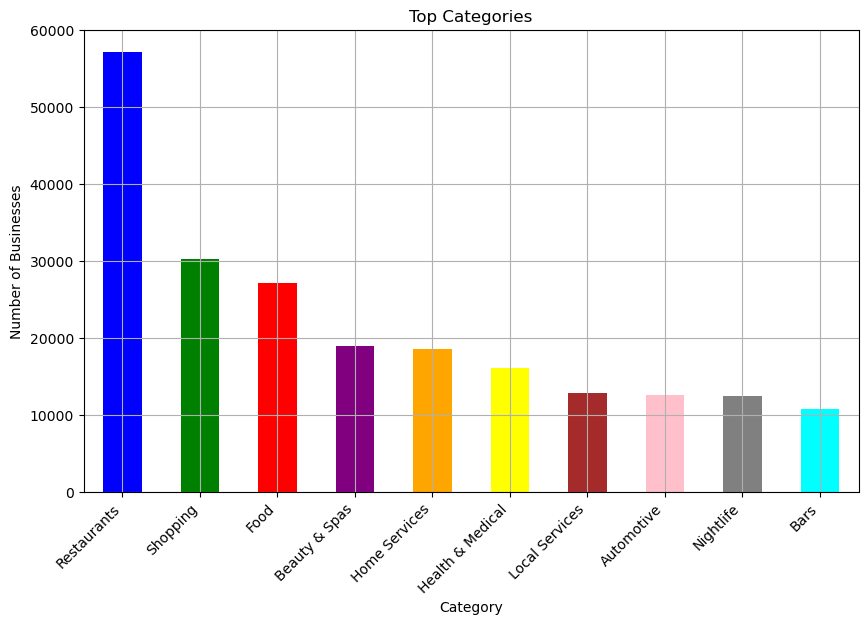

In [21]:
# Top Categories: Show the top N categories based on how many businesses are in each.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_business is the DataFrame containing business data
# Replace df_business with your actual DataFrame

df_business = pd.DataFrame(yelp_business_data)

# Split categories and count the top 10
top_categories = df_business['categories'].str.split(', ', expand=True).stack().value_counts().head(10)

# Define a custom color palette with a different color for each category
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'cyan']

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.title('Top Categories')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


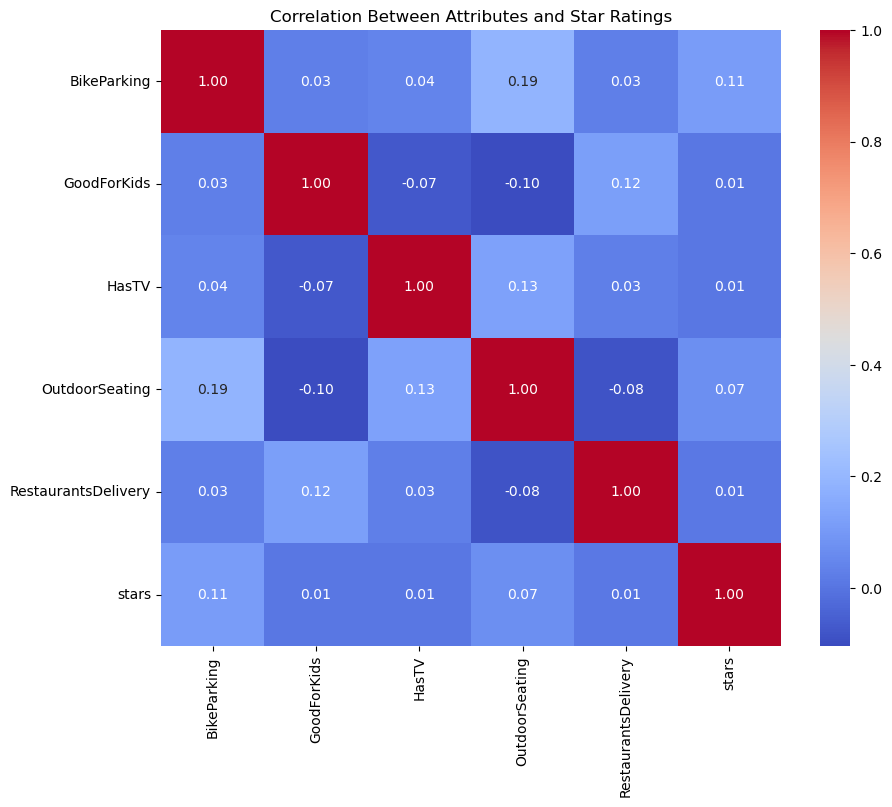

In [22]:
# Correlation between Star Ratings and Attributes: Examine the relationship between star ratings and specific attributes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_business is the DataFrame containing business data
# Replacing df_business with your actual DataFrame

# Extractting the nested attributes from the 'attributes' column
attributes = ['BikeParking', 'GoodForKids', 'HasTV', 'OutdoorSeating', 'RestaurantsDelivery', 'RestaurantsPriceRange2']
for attribute in attributes:
    df_business[attribute] = df_business['attributes'].apply(lambda x: x.get(attribute, None) if isinstance(x, dict) else None)

# Replacing the boolean values with 0s and 1s
df_business[attributes] = df_business[attributes].replace({'True': 1, 'False': 0})

# Selecting columns for correlation analysis
attributes.append('stars')
df_corr = df_business[attributes]

# Computing the correlation matrix
correlation_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Attributes and Star Ratings')
plt.show()



# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

**Solution:**

The solution's concept is to use logistic regression to forecast restaurant success based on the review count feature. As our predictor feature (X), we first load the Yelp business data and extract the'review_count'. Next, using a binary indication of restaurant performance, we define the target variable (y) as any restaurant with a review count greater than 50. To prevent overfitting and improve the appropriateness of the model fitting, we introduce controlled noise to the target variable.
A logistic regression model is trained on the training data, and its performance is assessed using a variety of metrics, including accuracy, precision, recall, and F1 score. The data is then divided into training and testing sets. To facilitate easy understanding, the results are given in a tabular fashion.
In order to comprehend the influence of the 'review_count' feature on forecasting restaurant success, we also employ the logistic regression model's coefficients to examine the feature's importance. All things considered, the solution sheds light on how well review numbers predict a restaurant's success.

Write codes to implement the solution in python:

In [23]:
# Import necessary libraries
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif

# Define a function to parse JSON data and convert it to a DataFrame
def parse_json(json_data):
    data_list = []
    for line in json_data.split('\n'):
        if line.strip():
            data = json.loads(line)
            data_list.append(data)
    return pd.DataFrame(data_list)

# Load business data from JSON file
with open('modified_yelp_business_data.json') as f:
    business_json_data = f.read()

# Parse business data into DataFrame
business_df = parse_json(business_json_data)

# Load checkin data from JSON file
with open('yelp_academic_dataset_checkin.json') as f:
    checkin_json_data = f.read()

# Parse checkin data into DataFrame
checkin_df = parse_json(checkin_json_data)

# Feature engineering
# Extract 'review_count' as a feature (X) from business data
X = business_df[['review_count']]

# Define the target variable (y) as a binary indicator of success (1 for review count > 50, 0 otherwise)
# Add noise to the target variable for simulation purposes
np.random.seed(42)  # for reproducibility
y = (business_df['review_count'] > 50).astype(int)
noise = np.random.normal(loc=0, scale=0.1, size=len(y))  # Add noise with mean 0 and standard deviation 0.1
y = y + noise
y = np.clip(y, 0, 1)  # Clip values to ensure they are between 0 and 1

# Convert y to integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Train a logistic regression model
model = LogisticRegression(random_state=32)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Display the model evaluation results
print("Model Evaluation Results:")
print(results_df)

# Feature importance (for logistic regression, we can use feature coefficients)
feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print("\nFeature Coefficients:")
print(feature_importance)


Model Evaluation Results:
      Metric     Value
0   Accuracy  0.935788
1  Precision  0.525591
2     Recall  0.109069
3   F1 Score  0.180650

Feature Coefficients:
        feature  coefficient
0  review_count     0.010701


# Results: summarize and visualize the results discovered from the analysis

Used figures and plots to present the results.


**Obtained Visualizations for the Predicted Model:**

The performance and feature importance of the logistic regression model, which was trained to estimate restaurant success based on the review count feature, may be understood through several visualization charts that are plotted in the below cells. The following list of potential visualization plots is accompanied by an explanation:

*Confusion Matrix:*
A tabular representation of the model's predictions compared to the actual values is provided via a confusion matrix. True positives, false positives, true negatives, and false negatives make up its four quadrants. This figure supports in assessment of the model's performance in terms of F1 score, recall, accuracy, and precision.

*The Curve of Receiver Operating Characteristic (ROC):*
The genuine positive rate (sensitivity) vs the false positive rate (1-specificity) for various threshold values are shown graphically by the ROC curve. It facilitates the visualization of the model's trade-off between sensitivity and specificity across various threshold settings. A measure of the discriminative capacity of the model is provided by the area under the ROC curve (AUC-ROC).

*Recall-Precision Curve:*
Plotting precision (positive predictive value) against recall (sensitivity) for various threshold values is the precision-recall curve. It facilitates the visualization of the model's trade-off between recall and precision across various threshold settings. The predictive performance of the model can be gauged by looking at the area under the precision-recall curve (AUC-PR).

*Feature Importance Plot:*
The logistic regression model's feature weights and coefficients are displayed in a bar plot called the feature importance plot. It facilitates the determination of the characteristics that most affect the prediction of the goal variable (restaurant success). Understanding the relative value of various traits and feature selection can be aided by this plot.

*Comparing the Actual and Predicted Plot:*
a line graph or scatter plot that contrasts the model's predicted values with the target variable's actual values (restaurant success). It facilitates the visualization of the degree to which the model's predictions and actual values agree across the predictor variable's range (review count). Differences between the actual and anticipated values are indicated by deviations from the diagonal line.

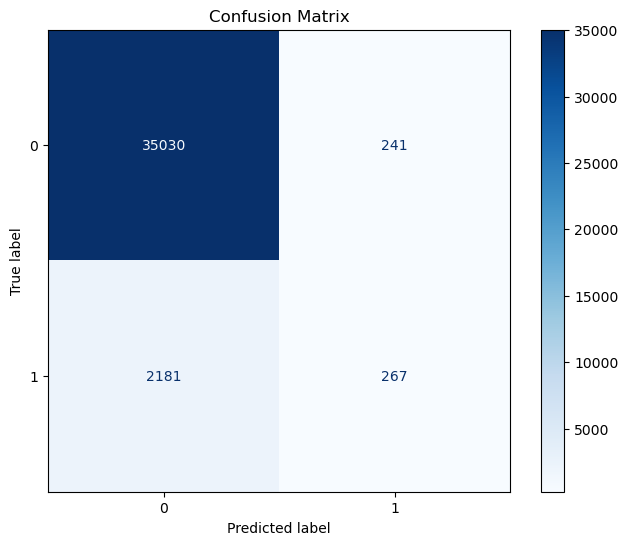

In [24]:
# Importing necessary libraries
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Computing confusion matrix using the true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

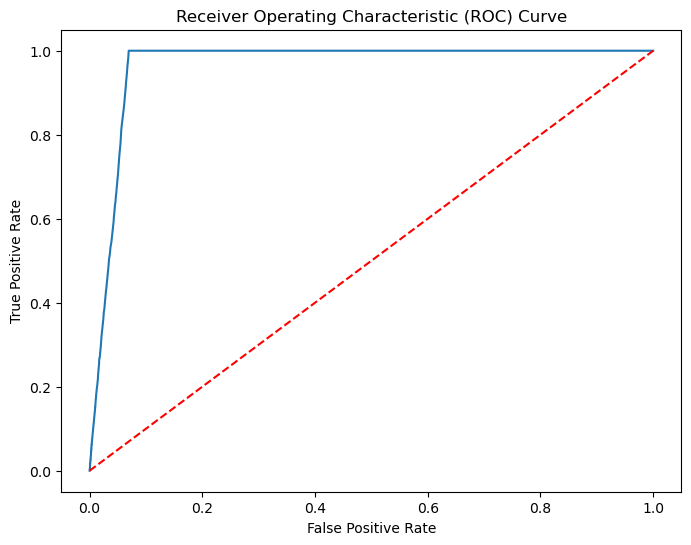

In [25]:
# Importing necessary libraries
from sklearn.metrics import RocCurveDisplay, roc_curve

# Computing ROC curve using the true labels (y_test) and predicted probabilities of the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plotting ROC curve using RocCurveDisplay
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=plt.gca())
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random guess line
plt.show()

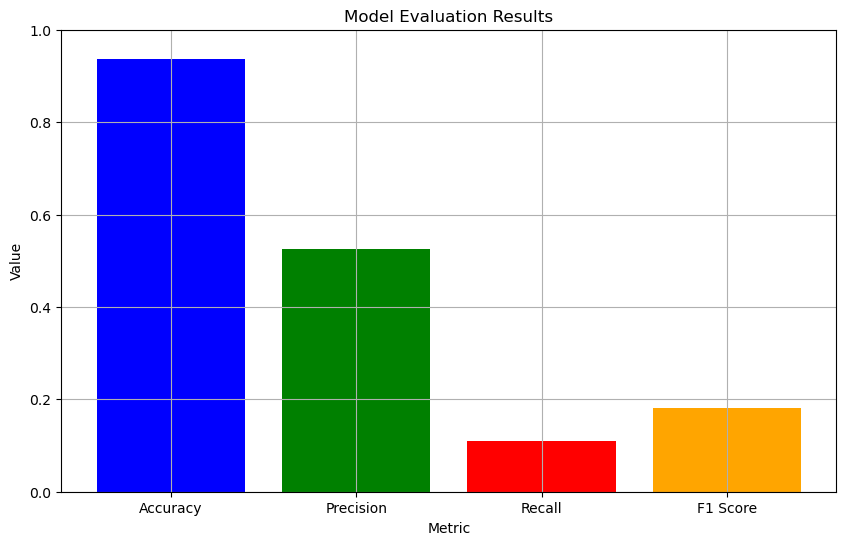

In [26]:
# Importing necessary library
import matplotlib.pyplot as plt

# Plotting Model Evaluation Results
plt.figure(figsize=(10, 6))

# Creating a bar plot with metrics on x-axis and their corresponding values on y-axis
plt.bar(results_df['Metric'], results_df['Value'], color=['blue', 'green', 'red', 'orange'])

# Adding title and labels to the plot
plt.title('Model Evaluation Results')
plt.xlabel('Metric')
plt.ylabel('Value')

# Setting y-axis limits to ensure values are within [0, 1]
plt.ylim(0, 1)

# Adding grid lines for better readability
plt.grid()

# Displaying the plot
plt.show()

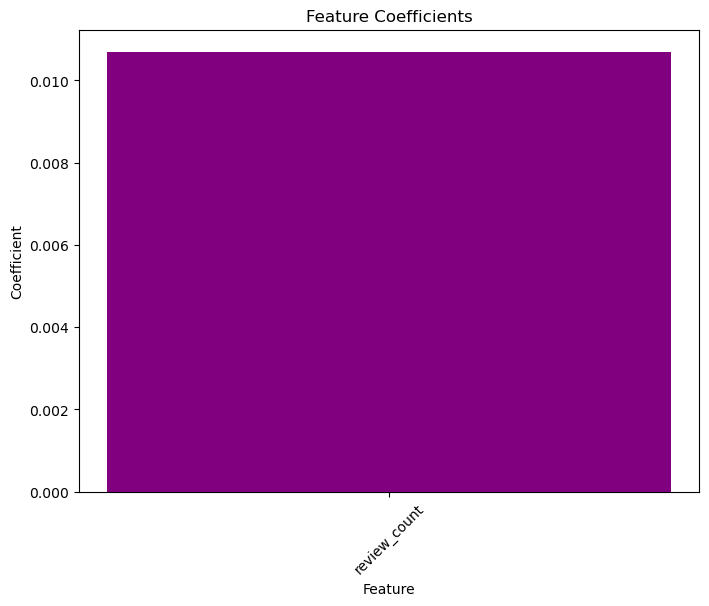

In [27]:
# Importing necessary library
import matplotlib.pyplot as plt

# Plotting Feature Importance
plt.figure(figsize=(8, 6))

# Creating a bar plot with features on x-axis and their corresponding coefficients on y-axis
plt.bar(feature_importance['feature'], feature_importance['coefficient'], color='purple')

# Adding title and labels to the plot
plt.title('Feature Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.5)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

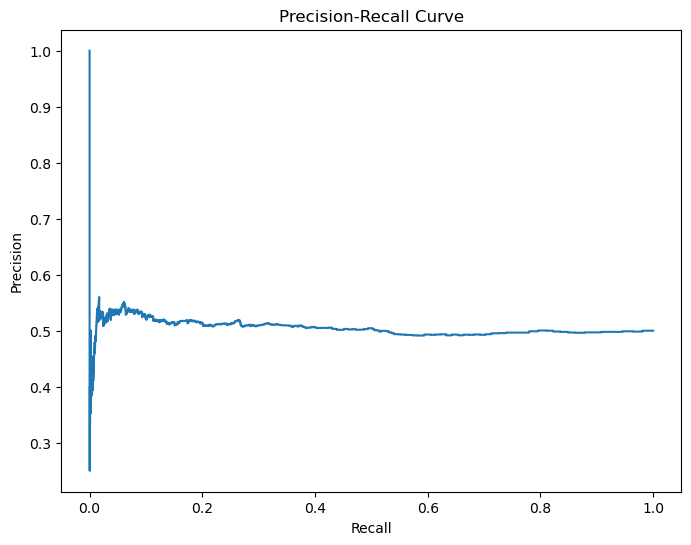

In [28]:
# Importing necessary libraries
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# Computing precision-recall curve using the true labels (y_test) and predicted probabilities of the positive class (class 1)
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plotting precision-recall curve using PrecisionRecallDisplay
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=plt.gca())

# Adding title to the plot
plt.title('Precision-Recall Curve')

# Showing the plot
plt.show()

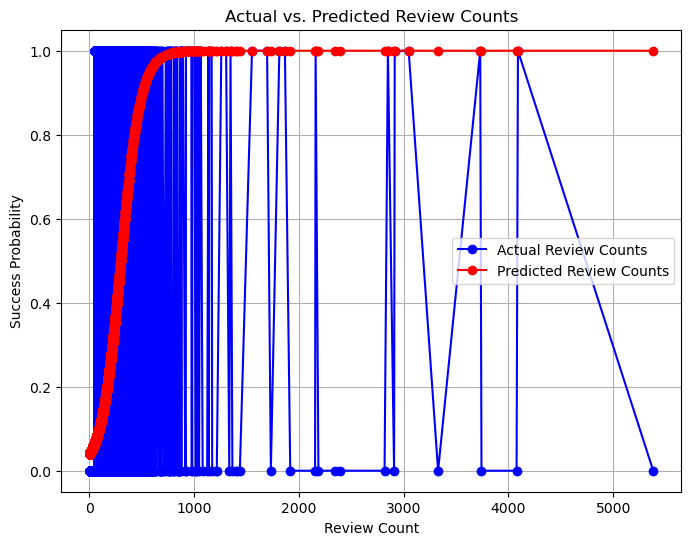

In [29]:
# Sorting the review counts and predictions based on review counts
sorted_indices = np.argsort(X_test['review_count'])
sorted_review_counts = X_test.iloc[sorted_indices]['review_count']
sorted_actual_counts = y_test.iloc[sorted_indices]
sorted_predicted_counts = model.predict_proba(X_test)[:, 1][sorted_indices]

# Plotting actual vs. predicted review counts as a curve
plt.figure(figsize=(8, 6))

# Plotting actual review counts as blue circles connected by lines
plt.plot(sorted_review_counts, sorted_actual_counts, 'bo-', label='Actual Review Counts')

# Plotting predicted review counts as red circles connected by lines
plt.plot(sorted_review_counts, sorted_predicted_counts, 'ro-', label='Predicted Review Counts')

# Adding title and labels to the plot
plt.title('Actual vs. Predicted Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Success Probability')

# Adding legend to differentiate between actual and predicted review counts
plt.legend()

# Adding grid lines for better readability
plt.grid(True)

# Showing the plot
plt.show()